In [8]:
!mkdir ../scratch
!wget https://zenodo.org/api/records/3445364/files-archive -O ../scratch/archive.zip
!mkdir ../scratch/data
!unzip -f ../scratch/archive.zip -d ../scratch/data/

mkdir: ../scratch: File exists
--2025-10-05 03:04:33--  https://zenodo.org/api/records/3445364/files-archive
Resolving zenodo.org (zenodo.org)... 2001:1458:d00:25::100:372, 2001:1458:d00:61::100:2f3, 2001:1458:d00:24::100:f6, ...
Connecting to zenodo.org (zenodo.org)|2001:1458:d00:25::100:372|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘../scratch/archive.zip’

../scratch/archive.     [<=>                 ] 194.57M  13.9MB/s    in 15s     

2025-10-05 03:04:49 (13.0 MB/s) - ‘../scratch/archive.zip’ saved [204018658]

mkdir: ../scratch/data: File exists
Archive:  ../scratch/archive.zip
replace ../scratch/data//ov2295_clone_clusters.csv.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

OSError: [Errno 5] Input/output error

In [18]:
DATA_DIR = "../data/laks"
PHERTILIZER_OUTPUTS = "../phertilizer-outputs/laks"

In [19]:
import pandas as pd
import numpy as np

In [21]:
df_clone_clusters = pd.read_csv(f"{DATA_DIR}/ov2295_clone_clusters.csv.gz")
df_clone_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [22]:
df_phertilizer = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/cell_clusters.csv")
df_phertilizer

,cluster,subcluster,cell
0,6,0,SA1090-A96213A-R20-C08
1,4,0,SA1090-A96213A-R20-C09
2,4,0,SA1090-A96213A-R20-C10
3,4,0,SA1090-A96213A-R20-C11
4,4,0,SA1090-A96213A-R20-C12
...,...,...,...
1717,9,0,SA922-A90554B-R35-C66
1718,9,0,SA922-A90554B-R35-C67
1719,9,0,SA922-A90554B-R35-C68
1720,8,0,SA922-A90554B-R35-C69


In [24]:
df = pd.merge(df_phertilizer, df_clone_clusters,
                     left_on="cell",
                     right_on="cell_id",
                     how="left")

df

,cluster,subcluster,cell,cell_id,clone_id
0,6,0,SA1090-A96213A-R20-C08,NaN,NaN
1,4,0,SA1090-A96213A-R20-C09,SA1090-A96213A-R20-C09,C
2,4,0,SA1090-A96213A-R20-C10,NaN,NaN
3,4,0,SA1090-A96213A-R20-C11,SA1090-A96213A-R20-C11,C
4,4,0,SA1090-A96213A-R20-C12,SA1090-A96213A-R20-C12,D
...,...,...,...,...,...
1717,9,0,SA922-A90554B-R35-C66,NaN,NaN
1718,9,0,SA922-A90554B-R35-C67,NaN,NaN
1719,9,0,SA922-A90554B-R35-C68,NaN,NaN
1720,8,0,SA922-A90554B-R35-C69,SA922-A90554B-R35-C69,E


In [25]:
df['clone_id'] = df['clone_id'].fillna('NA')

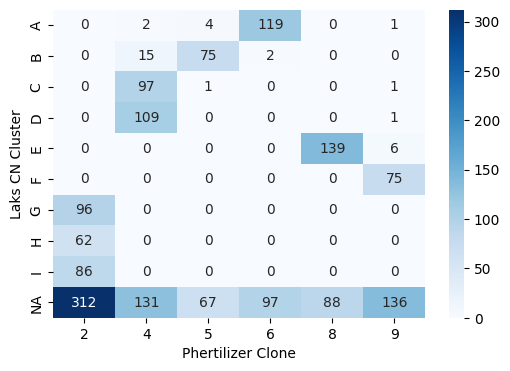

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = pd.crosstab(df['clone_id'], df['cluster'], rownames=['Laks CN Cluster'], colnames=['Phertilizer Clone'])

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [29]:
df_phertilizer["phertilizer_root"] = (df_phertilizer["cluster"] == 0).astype(int)

In [30]:
df_f_plus = pd.read_csv("../outputs/f_plus_roots.csv")
df_f_plus

,Unnamed: 0,mutation,F(+)
0,0,10:100129846:C:A,0
1,1,10:100185101:A:G,0
2,2,10:100209326:T:C,1
3,3,10:100283942:C:T,0
4,4,10:10086005:G:T,0
...,...,...,...
14063,14063,X:98278474:C:A,0
14064,14064,X:98452192:T:C,0
14065,14065,X:98700894:C:T,1
14066,14066,X:99136386:C:T,0


In [37]:
df_phertilizer_mutations = pd.read_csv(f"{PHERTILIZER_OUTPUTS}/SNV_clusters.csv")
df_phertilizer_mutations["mutation"] = df_phertilizer_mutations["mutation"].str.split("_").str[1]
df_phertilizer_mutations

,cluster,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [38]:
df_phertilizer_mutations["phertilizer_root"] = (df_phertilizer_mutations["cluster"] == 0).astype(int)
df_phertilizer_mutations

,cluster,mutation,phertilizer_root
0,7,10:100129846:C:A,0
1,7,10:100185101:A:G,0
2,0,10:100209326:T:C,1
3,7,10:100283942:C:T,0
4,5,10:10086005:G:T,0
...,...,...,...
13827,2,X:98278474:C:A,0
13828,4,X:98452192:T:C,0
13829,0,X:98700894:C:T,1
13830,7,X:99136386:C:T,0


In [39]:
df = pd.merge(df_phertilizer_mutations, df_f_plus,
                    on="mutation",
                     how="right")

df

,cluster,mutation,phertilizer_root,Unnamed: 0,F(+)
0,7.0,10:100129846:C:A,0.0,0,0
1,7.0,10:100185101:A:G,0.0,1,0
2,0.0,10:100209326:T:C,1.0,2,1
3,7.0,10:100283942:C:T,0.0,3,0
4,5.0,10:10086005:G:T,0.0,4,0
...,...,...,...,...,...
14063,2.0,X:98278474:C:A,0.0,14063,0
14064,4.0,X:98452192:T:C,0.0,14064,0
14065,0.0,X:98700894:C:T,1.0,14065,1
14066,7.0,X:99136386:C:T,0.0,14066,0


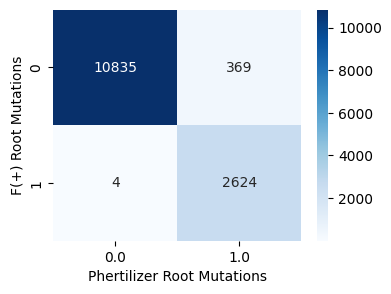

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cm = pd.crosstab(df['F(+)'], df['phertilizer_root'], rownames=['F(+) Root Mutations'], colnames=['Phertilizer Root Mutations'])

# Plot
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()